In [33]:
import gensim.downloader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
from gensim.models import KeyedVectors
from keras.layers import Dense, Flatten, LSTM, GRU, Bidirectional, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence, text
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from spacy.tokenizer import Tokenizer

In [34]:
data = pd.read_csv('data\preprocessed.csv').dropna()

In [35]:
nlp = spacy.load("en_core_web_sm")
#glove = gensim.downloader.load('glove-twitter-200')
#glove.save("glove.model")
glove = KeyedVectors.load("glove.model")

In [36]:
def get_vector(sent):
    for word in sent.lower().split(' '):
        if word.isalpha() == True:
            try:
                return glove[word].tolist()
            except KeyError:
                return glove['unk'].tolist()
        else:
            return glove['unk'].tolist()

In [37]:
def pad_trunc(data, maxlen):
    new_data = []
    zero_vector = []
    for _ in range(len(data[0][0])):
        zero_vector.append(0.0)
    for sample in data:
        if len(sample) > maxlen:
            temp = sample[:maxlen]
        elif len(sample) < maxlen:
            temp = sample
            additional_elems = maxlen - len(sample)
            for _ in range(additional_elems):
                temp.append(zero_vector)
        else:
            temp = sample
        new_data.append(temp)
        
    return new_data

In [38]:
data['vectors'] =  data['Reviews_cleaned'].apply(lambda x: [get_vector(x)])

In [39]:
X = data['vectors']
y = data["Category"]
X = np.array(pad_trunc(X, 3))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
X_train.shape, X_test.shape, X.shape

((32560, 3, 200), (8140, 3, 200), (40700, 3, 200))

In [42]:
model = Sequential()
model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/10
1628/1628 [==============================] - 26s 9ms/step - loss: 0.4513 - accuracy: 0.8188 - val_loss: 0.4302 - val_accuracy: 0.8308
Epoch 2/10
1628/1628 [==============================] - 15s 9ms/step - loss: 0.4436 - accuracy: 0.8201 - val_loss: 0.4321 - val_accuracy: 0.8308
Epoch 3/10
1628/1628 [==============================] - 17s 10ms/step - loss: 0.4438 - accuracy: 0.8201 - val_loss: 0.4301 - val_accuracy: 0.8308
Epoch 4/10
1628/1628 [==============================] - 17s 10ms/step - loss: 0.4433 - accuracy: 0.8201 - val_loss: 0.4297 - val_accuracy: 0.8308
Epoch 5/10
1628/1628 [==============================] - 37s 23ms/step - loss: 0.4431 - accuracy: 0.8201 - val_loss: 0.4304 - val_accuracy: 0.8308 0.4433 - accura
Epoch 6/10
1628/1628 [==============================] - 29s 18ms/step - loss: 0.4434 - accuracy: 0.8201 - val_loss: 0.4326 - val_accuracy: 0.8308
Epoch 7/10
1628/1628 [==============================] - 34s 21ms/step - loss: 0.4434 - accuracy: 0.8201 - val_

In [44]:
y_pred = np.round(model.predict(X_test))
cohen_kappa_score(y_test, y_pred)

0.5154885092632424

In [45]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

In [46]:
f1_score(y_test, y_pred)

0.8901271385967666

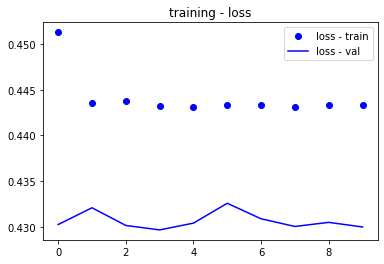

In [47]:
plot_history(history)

In [48]:
model = Sequential()
model.add(Bidirectional(GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/10
1628/1628 [==============================] - 30s 9ms/step - loss: 0.4480 - accuracy: 0.8199 - val_loss: 0.4315 - val_accuracy: 0.8308
Epoch 2/10
1628/1628 [==============================] - 15s 9ms/step - loss: 0.4437 - accuracy: 0.8201 - val_loss: 0.4332 - val_accuracy: 0.8308
Epoch 3/10
1628/1628 [==============================] - 16s 10ms/step - loss: 0.4434 - accuracy: 0.8201 - val_loss: 0.4316 - val_accuracy: 0.8308
Epoch 4/10
1628/1628 [==============================] - 17s 11ms/step - loss: 0.4433 - accuracy: 0.8201 - val_loss: 0.4295 - val_accuracy: 0.8308
Epoch 5/10
1628/1628 [==============================] - 34s 21ms/step - loss: 0.4433 - accuracy: 0.8201 - val_loss: 0.4313 - val_accuracy: 0.8308
Epoch 6/10
1628/1628 [==============================] - 26s 16ms/step - loss: 0.4434 - accuracy: 0.8201 - val_loss: 0.4305 - val_accuracy: 0.8308
Epoch 7/10
1628/1628 [==============================] - 33s 20ms/step - loss: 0.4432 - accuracy: 0.8201 - val_loss: 0.4326 - v

In [49]:
y_pred = np.round(model.predict(X_test))
cohen_kappa_score(y_test, y_pred)

0.5154885092632424

In [50]:
f1_score(y_test, y_pred)

0.8901271385967666